# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | high rock
Processing Record 2 of Set 1 | turukhansk
Processing Record 3 of Set 1 | cariati
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | rochester
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | graaff-reinet
Processing Record 8 of Set 1 | lublin
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | amboise
Processing Record 16 of Set 1 | maragogi
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | aksu
Processing Record 20 of Set 1 | tessalit
Processing Record 21 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 22 of Set 1 | vila do maio
Pr

Processing Record 38 of Set 4 | brae
Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | macapa
Processing Record 41 of Set 4 | nyurba
Processing Record 42 of Set 4 | alice springs
Processing Record 43 of Set 4 | vilcun
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | acajutla
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | baykit
Processing Record 49 of Set 4 | sangar
Processing Record 0 of Set 5 | anshun
Processing Record 1 of Set 5 | pazmand
Processing Record 2 of Set 5 | penhold
Processing Record 3 of Set 5 | rungata
City not found. Skipping...
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | hare bay
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Record 7 of Set 5 | altay
Processing Record 8 of Set 5 | toora-khem
Processing Record 9 of Set 5 | bredasdorp
Processing Record 

Processing Record 27 of Set 8 | bargal
City not found. Skipping...
Processing Record 28 of Set 8 | lufilufi
Processing Record 29 of Set 8 | calvia
Processing Record 30 of Set 8 | bongandanga
Processing Record 31 of Set 8 | carauari
Processing Record 32 of Set 8 | kataysk
Processing Record 33 of Set 8 | culiacancito
Processing Record 34 of Set 8 | eirunepe
Processing Record 35 of Set 8 | port macquarie
Processing Record 36 of Set 8 | lasa
Processing Record 37 of Set 8 | emerald
Processing Record 38 of Set 8 | ust-kuyga
Processing Record 39 of Set 8 | tawkar
City not found. Skipping...
Processing Record 40 of Set 8 | mecca
Processing Record 41 of Set 8 | klyuchi
Processing Record 42 of Set 8 | santa rosa
Processing Record 43 of Set 8 | arraial do cabo
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | srandakan
Processing Record 46 of Set 8 | baruun-urt
Processing Record 47 of Set 8 | hastings
Processing Record 48 of Set 8 | honiara
Processing Record 49 of Set 8 | sawa

Processing Record 15 of Set 12 | nalut
Processing Record 16 of Set 12 | antofagasta
Processing Record 17 of Set 12 | akyab
Processing Record 18 of Set 12 | villa alemana
Processing Record 19 of Set 12 | el tigre
Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | kibre mengist
Processing Record 23 of Set 12 | westpunt
City not found. Skipping...
Processing Record 24 of Set 12 | pringsewu
Processing Record 25 of Set 12 | bam
Processing Record 26 of Set 12 | bud
Processing Record 27 of Set 12 | melfi
Processing Record 28 of Set 12 | jarinu
Processing Record 29 of Set 12 | barcelona
Processing Record 30 of Set 12 | rassvet
Processing Record 31 of Set 12 | wonthaggi
Processing Record 32 of Set 12 | borba
Processing Record 33 of Set 12 | mahajanga
Processing Record 34 of Set 12 | pailitas
Processing Record 35 of Set 12 | nosy varika
Processing Record 36 of Set 12 | victoria
Processing Record 37 of Set 12 | faya
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,high rock,26.62,-78.28,73.98,76,77,25.17,BS,1589437697
1,turukhansk,65.82,87.98,45.73,53,0,7.65,RU,1589437099
2,cariati,39.49,16.96,73.00,52,88,11.41,IT,1589437697
3,aklavik,68.22,-135.01,20.98,95,99,5.44,CA,1589437118
4,rochester,43.15,-77.62,42.01,74,75,6.40,US,1589437484


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,21.358052,16.431448,63.695603,68.574138,50.463793,7.701362,1.589438e+09
std,32.603441,88.716618,18.182915,22.948911,36.976822,5.212179,8.751123e+01
min,-54.800000,-175.200000,17.010000,1.000000,0.000000,0.160000,1.589437e+09
25%,-4.885000,-62.767500,48.200000,54.000000,13.000000,3.552500,1.589438e+09
50%,26.290000,18.765000,66.175000,73.000000,50.500000,6.835000,1.589438e+09
75%,47.785000,96.115000,78.800000,87.000000,89.000000,10.290000,1.589438e+09
max,78.220000,179.320000,109.690000,100.000000,100.000000,39.150000,1.589438e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,high rock,26.62,-78.28,73.98,76,77,25.17,BS,1589437697
1,turukhansk,65.82,87.98,45.73,53,0,7.65,RU,1589437099
2,cariati,39.49,16.96,73.00,52,88,11.41,IT,1589437697
3,aklavik,68.22,-135.01,20.98,95,99,5.44,CA,1589437118
4,rochester,43.15,-77.62,42.01,74,75,6.40,US,1589437484


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

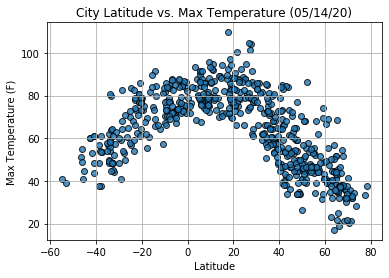

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

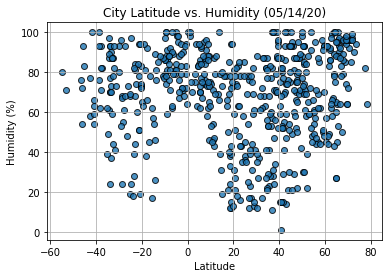

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

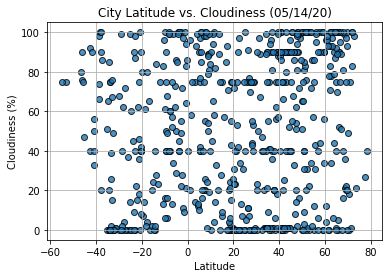

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

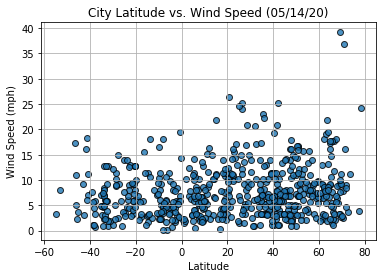

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6822476349874463


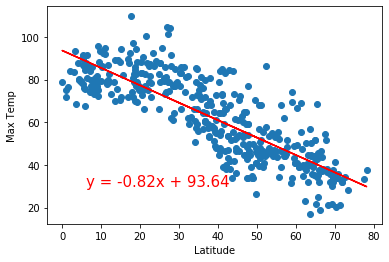

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5732349185972144


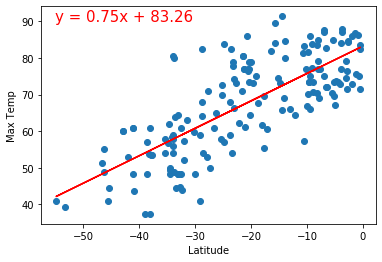

In [17]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025845188553222764


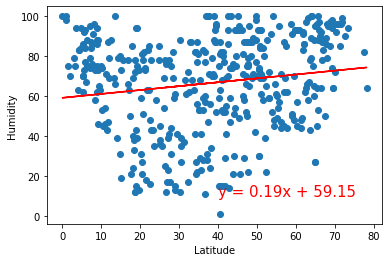

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03383976703976679


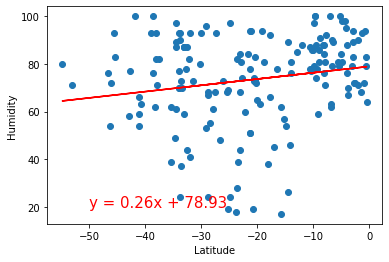

In [19]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.017541129888482814


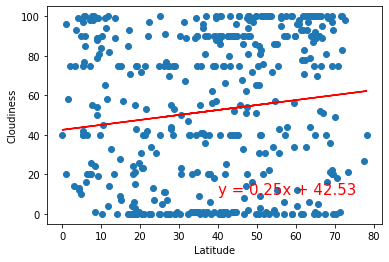

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011726056488245831


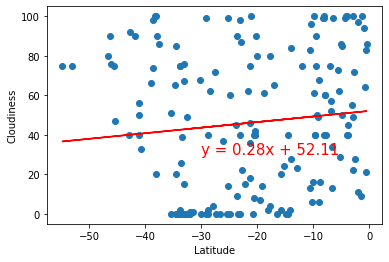

In [21]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010885358373917537


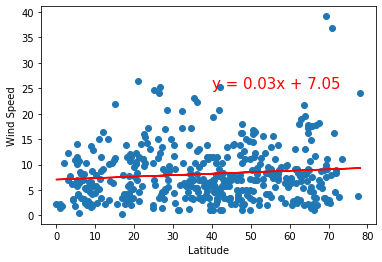

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0013703290047331266


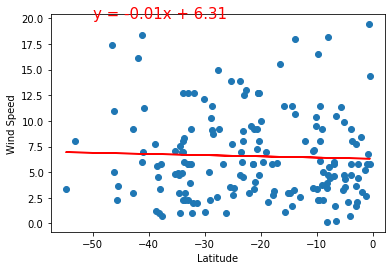

In [23]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))